In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [2]:
history_file_path = "../temp/simulation_study/training_histories/method=matfac/snr=99.0/topk=toy_original/rep=0.json"
data = json.load(open(history_file_path, "r"))

In [3]:
final_losses = [datum["history"][-1] for datum in data]

In [4]:
lambdas = [d["lambda_Y"] for d in data]
final_data_losses = np.array([d["data_loss"] for d in final_losses])
final_Y_reg_losses = np.array([d["Y_reg_loss"] for d in final_losses])
final_X_reg_losses = np.array([d["X_reg_loss"] for d in final_losses])
final_row_layer_reg_losses = np.array([d["row_layer_reg_loss"] for d in final_losses])
final_col_layer_reg_losses = np.array([d["col_layer_reg_loss"] for d in final_losses])
final_losses = final_data_losses + final_X_reg_losses + final_Y_reg_losses + final_row_layer_reg_losses + final_col_layer_reg_losses

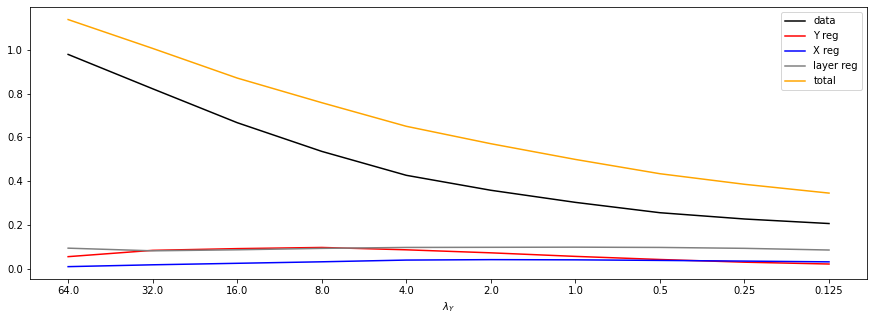

In [5]:
fig = plt.figure(figsize=(15,5))
plt.plot(final_data_losses, color="black", label="data")
plt.plot(final_Y_reg_losses, color="red", label="Y reg")
plt.plot(final_X_reg_losses, color="blue", label="X reg")
plt.plot(final_col_layer_reg_losses, color="gray", label="layer reg")
plt.plot(final_losses, color="orange", label="total")
plt.legend()
plt.xticks(range(len(lambdas)), lambdas)
plt.xlabel("$\lambda_Y$")
plt.show()

In [6]:
precs = [datum["average_precisions"] for datum in data]
prec_means = [np.mean(p) for p in precs]
prec_mins = [np.min(p) for p in precs]
prec_meds = [np.median(p) for p in precs]

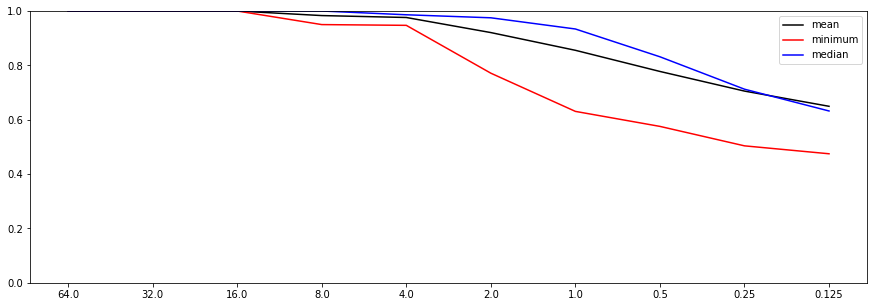

In [7]:
fig = plt.figure(figsize=(15,5))
plt.plot(prec_means, color="black", label="mean")
plt.plot(prec_mins, color="red", label="minimum")
plt.plot(prec_meds, color="blue", label="median")
plt.ylim([0,1])
plt.xticks(range(len(lambdas)), lambdas)
plt.legend()
plt.show()

In [8]:
K = 5
precs_x = np.repeat(np.arange(len(lambdas)),K)
precs_y = np.concatenate(precs)

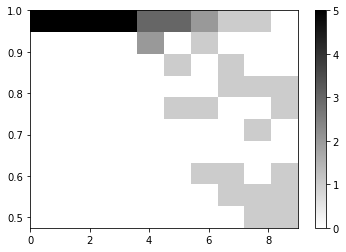

In [9]:
plt.hist2d(precs_x, precs_y, cmap="gray_r", bins=len(lambdas))
plt.colorbar()
plt.show()

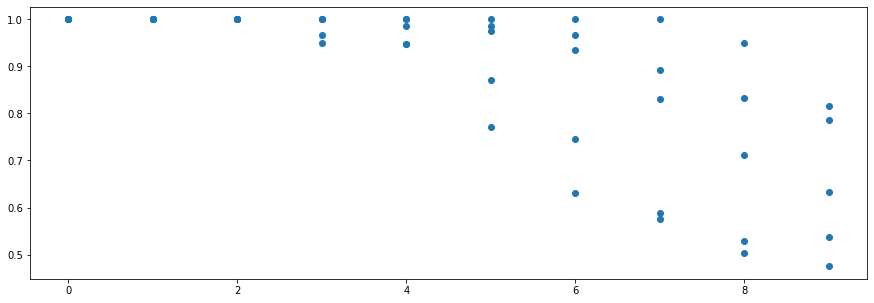

In [10]:
fig = plt.figure(figsize=(15,5))
plt.scatter(precs_x, precs_y)
plt.show()

In [11]:
full_loss_history = [step["data_loss"] + step["Y_reg_loss"] + step["X_reg_loss"] + step["row_layer_reg_loss"] + step["col_layer_reg_loss"] for datum in data for step in datum["history"]]

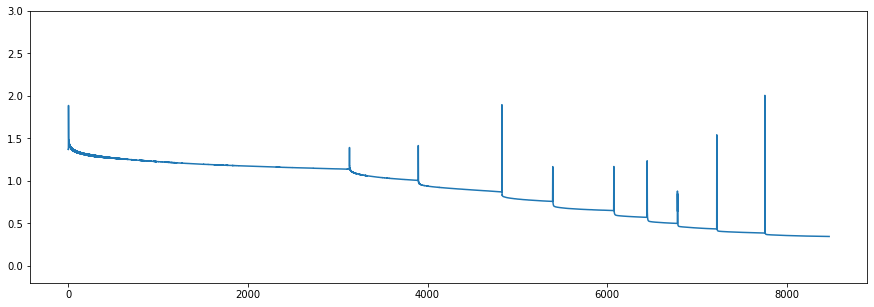

In [12]:
plt.figure(figsize=(15,5))
plt.plot(full_loss_history)
plt.ylim([-0.2,3])
plt.show()

In [13]:
full_loss_history[500]

1.2661372084260065

In [14]:
full_loss_history[-1]

0.34550165543924977